In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180 

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [11]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


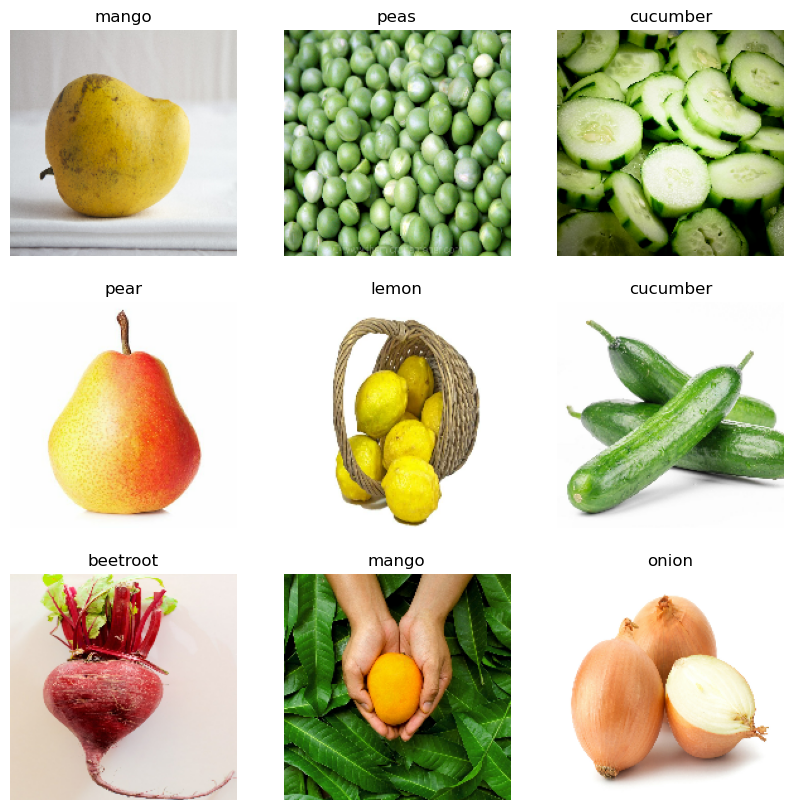

In [17]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential

In [21]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.0368 - loss: 3.9687 - val_accuracy: 0.2137 - val_loss: 2.7921
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.1911 - loss: 2.9062 - val_accuracy: 0.4872 - val_loss: 1.8770
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.3391 - loss: 2.2824 - val_accuracy: 0.6268 - val_loss: 1.3159
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.5074 - loss: 1.7491 - val_accuracy: 0.7692 - val_loss: 0.8830
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.6257 - loss: 1.2884 - val_accuracy: 0.8348 - val_loss: 0.6700
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.7501 - loss: 0.8679 - val_accuracy: 0.9031 - val_loss: 0.5363
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.8306 - loss: 0.5677 - val_accuracy: 0.9117 - val_loss: 0.5413
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.8960 - loss: 0.4093 - val_accu

Text(0.5, 1.0, 'Loss')

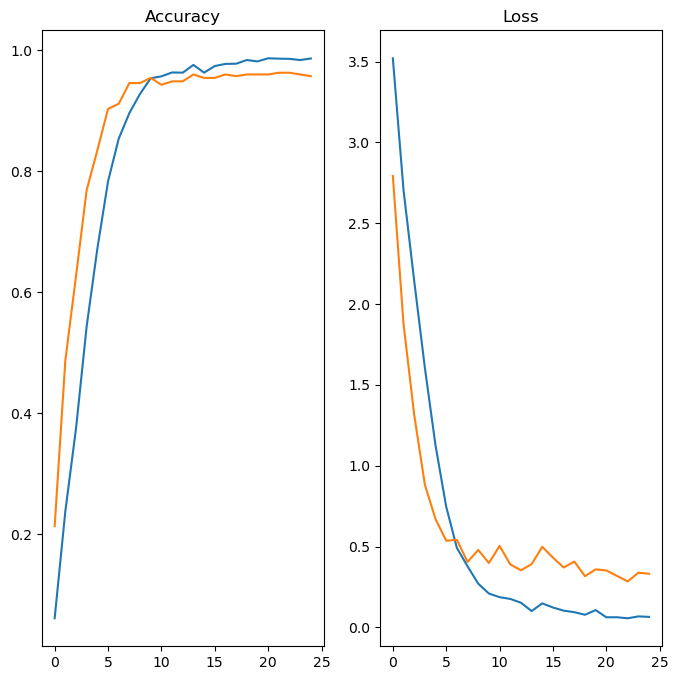

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [31]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [33]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [35]:
score = tf.nn.softmax(predict)

In [37]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 99.84


In [39]:
model.save('Image_classify.keras')